In [1]:
%matplotlib inline

## Following the procedure that Herschel helpdesk suggests

### Compare HSA product with CDF product

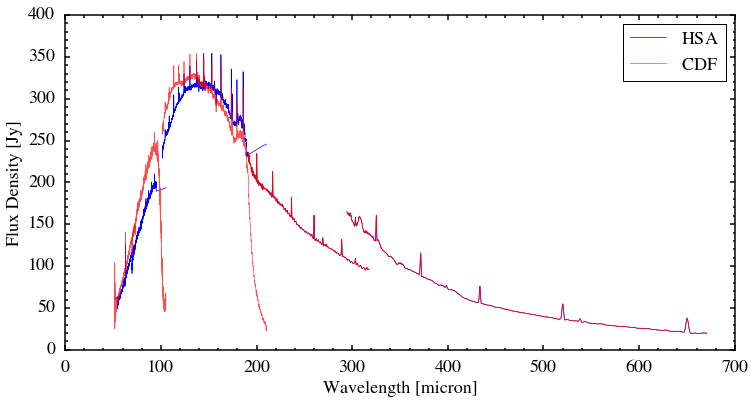

In [15]:
from astropy.io import ascii, fits
import astropy.constants as const
import matplotlib.pyplot as plt

c = const.c.cgs.value

# read HSA products
pacs_spec = []
pacs_ver = 'spec3x3'
for cam in ['b1','b2','r1','r2']:
    pacs_spec.append(ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/BHR71_'+pacs_ver+'_'+cam+'.txt',
                                data_start=4, names=['wave','flux']))
    
spire = fits.open('/Users/yaolun/bhr71/calibration_testing/HSA/bhr71_spire_point_apod.fits')
slw = [c/1e5/spire[5].data.field(0), spire[5].data.field(1)]
ssw = [c/1e5/spire[18].data.field(0), spire[18].data.field(1)]

# read CDF products
pacs_c = ascii.read('/Users/yaolun/bhr71/data/Herschel_spec/BHR71_central9Spaxels_PointSourceCorrected_trim.txt',
                      names=['wave','flux'], data_start=1)
# read the CDF pacs products by camera
pacs_spec_cdf = []
for foo in ['1342212230_blue','1342212230_red','1342212231_blue','1342212231_red']:
    pacs_spec_cdf.append(ascii.read(
        '/Users/yaolun/bhr71/calibration_testing/CDF/BHR71_'+pacs_ver+
        '_OBSID_'+foo+'_finalcubes_slice00_os8_sf7.fits.txt',
        names=['wave','flux'], data_start=4))

spire_c = fits.open('/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits')
slw_cdf = [c/1e5/spire_c[5].data.field(0), spire_c[5].data.field(1)]
ssw_cdf = [c/1e5/spire_c[18].data.field(0), spire_c[18].data.field(1)]

# plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# plot HSA
for i in range(len(pacs_spec)):
    pacs_hsa, = ax.plot(pacs_spec[i]['wave'], pacs_spec[i]['flux'], color='b', linestyle='-', linewidth=0.7)
spire_hsa, = ax.plot(slw[0], slw[1], color='b', linestyle='-', linewidth=0.7)
ax.plot(ssw[0], ssw[1], color='b', linestyle='-', linewidth=0.7)

# plot CDF
for i in range(len(pacs_spec_cdf)):
    pacs_cdf, = ax.plot(pacs_spec_cdf[i]['wave'], pacs_spec_cdf[i]['flux'], 
                        color='r', linestyle='-', linewidth=0.7, alpha=0.7)
# pacs_cdf, = ax.plot(pacs_c['wave'], pacs_c['flux'], color='r', linestyle='-', linewidth=0.7)
spire_cdf, = ax.plot(slw_cdf[0], slw_cdf[1], color='r', linestyle='-', linewidth=0.7)
ax.plot(ssw_cdf[0], ssw_cdf[1], color='r', linestyle='-', linewidth=0.7)

ax.legend([pacs_hsa, pacs_cdf], [r'$\rm{HSA}$', r'$\rm{CDF}$'], fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
fig.savefig('/Users/yaolun/bhr71/calibration_testing/cdf_hsa.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

### Semi-extended correction suggested by Herschel helpdesk

In [2]:
name = 'fitted_size'

In [3]:
# for bhr71 calibration 
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
# import seaborn as sns

irs = ascii.read('/Users/yaolun/bhr71/data/bhr71_spitzer_irs.txt',data_start=2, names=['Wavelength','Flux','Uncertainty'])
# SE-corrected from HSA products
pacs_b1 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b1_'+name+'.txt', data_start=4)
pacs_b2 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b2_'+name+'.txt', data_start=4)
pacs_r1 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r1_'+name+'.txt', data_start=4)
pacs_r2 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r2_'+name+'.txt', data_start=4)
spire = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100_'+name+'.txt', data_start=4)

# SE-corrected from CDF products
# pacs_b1_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b1_cdf_'+name+'.txt', data_start=4)
# pacs_b2_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b2_cdf_'+name+'.txt', data_start=4)
# pacs_r1_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r1_cdf_'+name+'.txt', data_start=4)
# pacs_r2_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r2_cdf_'+name+'.txt', data_start=4)
# spire_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100_cdf_'+name+'.txt', data_start=4)

spire_yly = ascii.read('/Users/yaolun/bhr71/bhr71_SECT/bhr71_spire_corrected_yly.txt')
spire_makiwa = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100_fitted_size.txt', data_start=4)

spire_slw = ascii.read('/Users/yaolun/bhr71/calibration_testing/bhr71_slw_tophat_weighted_sum.txt',
                       names=['wave','flux'])

# PACS data from CDF archive
pacs_cdf = ascii.read('/Users/yaolun/bhr71/data/Herschel_spec/BHR71_central9Spaxels_PointSourceCorrected_trim.txt')
# sum over 25 spaxels
pacs_5x5 = ascii.read('/Users/yaolun/test/BHR71_pacs_summed_5x5_os8_sf7.txt', names=['Wavelength','Flux'])

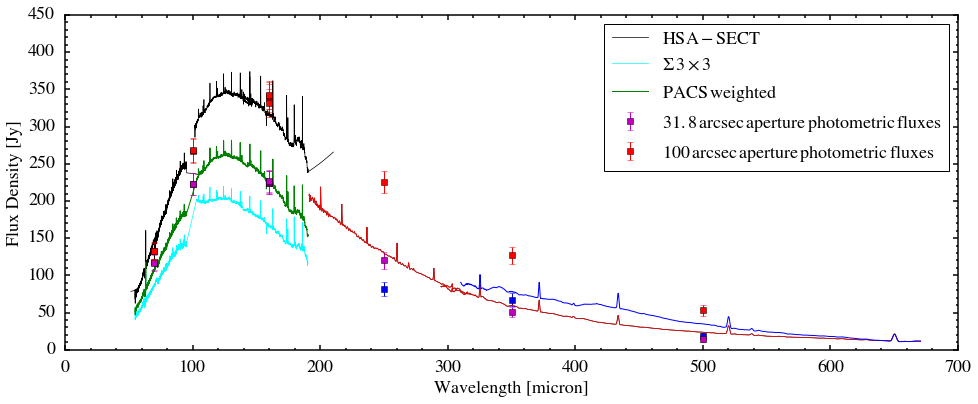

In [7]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
# sns.set_style("whitegrid")
# sns.choose_cubehelix_palette()
# PACS CDF
# ax.plot(pacs_cdf['Wavelength(um)'], pacs_cdf['Flux_Density(Jy)'], color='b', linewidth=0.7)

# ax.plot(irs['Wavelength'], irs['Flux'], linewidth=0.7)
hsa_sect, = ax.plot(pacs_b1['wave_0'], pacs_b1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_b2['wave_0'], pacs_b2['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r1['wave_0'], pacs_r1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r2['wave_0'], pacs_r2['flux_0'], linewidth=0.7, color='k')
ax.plot(spire['wave_segm1_0'], spire['flux_segm1_0'], linewidth=0.7, color='k')
ax.plot(spire['wave_segm2_0'], spire['flux_segm2_0'], linewidth=0.7, color='k')

ax.plot(spire_makiwa['wave_segm1_0'], spire_makiwa['flux_segm1_0'], linewidth=0.7, color='r')
ax.plot(spire_makiwa['wave_segm2_0'], spire_makiwa['flux_segm2_0'], linewidth=0.7, color='r')
ax.errorbar([250,350,500],[81.49,67.53,18.67], yerr=[9.03,8.22,4.32],
            marker='s', color='b', linestyle='None')

ax.plot(spire_slw['wave'], spire_slw['flux'])

# CDF
# cdf_sect, = ax.plot(pacs_b1_cdf['wave_0'], pacs_b1_cdf['flux_0'], linewidth=0.7, color='b')
# ax.plot(pacs_b2_cdf['wave_0'], pacs_b2_cdf['flux_0'], linewidth=0.7, color='b')
# ax.plot(pacs_r1_cdf['wave_0'], pacs_r1_cdf['flux_0'], linewidth=0.7, color='b')
# ax.plot(pacs_r2_cdf['wave_0'], pacs_r2_cdf['flux_0'], linewidth=0.7, color='b')

# summed spectra from rebinned cube
spec_sum3, = ax.plot(sum3['wave'], sum3['flux'], color='Cyan', linewidth=0.7)
# ax.plot(sum5['wave'], sum5['flux'], color='Cyan', linewidth=0.7)
# ax.plot(cen['wave'], cen['flux'])

spec_pacs_weight, = ax.plot(pacs_weight['Wavelength(um)'], pacs_weight['Flux(Jy)'])

# spire_cor, = ax.plot(spire_yly['Wavelength(um)'], spire_yly['Flux(Jy)'], color='r')

# ax.plot(pacs_5x5['Wavelength'], pacs_5x5['Flux'], linewidth=0.7)

# put in photometry
phot = ax.errorbar([70,70,100,100,160,160,160,160,250,350,500],
                   [117.45,117.01,222.83,222.77,224.77,224.75,225.26,226.98,120.18,50.66,14.02],
                   yerr=[10.84,10.82,14.93,14.93,14.99,14.99,15.01,15.07,10.96,7.12,3.75],
                   marker='s', color='m', linestyle='None')
phot100 = ax.errorbar([70,70,100,100,160,160,160,160,250,350,500],
                   [132.62,132.91,267.24,268.87,338.41,331.69,341.70,342.69,225.14,127.13,52.92],
                   yerr=[11.52,11.53,16.35,16.40,18.40,18.21,18.49,18.51,15.01,11.28,7.28],
                   marker='s', color='r', linestyle='None')
# phot21 = ax.errorbar([70,70,100,100,160,160,160,160],
#                      [104.28, 103.56, 187.37, 187.52, 170.80, 170.97, 171.61, 174.35],
#                      yerr=[10.21, 10.18, 13.69, 13.69, 13.07, 13.08, 13.1, 13.2],
#                      marker='s', color='b', linestyle='None')

# photometry measured within a 100" radius aperture
# [132.62,132.91,267.24,268.87,338.41,331.69,341.70,342.69,225.14,127.13,52.92]
# yerr = [11.52,11.53,16.35,16.40,18.40,18.21,18.49,18.51,15.01,11.28,7.28]

# photometry measured within 31.8" diameter aperture
# [117.45,117.01,222.83,222.77,224.77,224.75,225.26,226.98,224.84,65.31,13.47]
# yerr = [10.84,10.82,14.93,14.93,14.99,14.99,15.01,15.07,10.96,7.12,3.75]

# photometry measured within 21.9" diameter aperture
# [104,28, 103.56, 187.37, 187.52, 170.80, 170.97, 171.61, 174.35]
# yerr = [10.21, 10.18, 13.69, 13.69, 13.07, 13.08, 13.1, 13.2]

ax.legend([hsa_sect,
           spec_sum3, spec_pacs_weight,
           phot, phot100],
          [r'$\rm{HSA-SECT}$',
           r'$\rm{\Sigma\,3\times3}$',
           r'$\rm{PACS\,weighted}$',
           r'$\rm{31.8\,arcsec\,aperture\,photometric\,fluxes}$',
           r'$\rm{100\,arcsec\,aperture\,photometric\,fluxes}$',
#            r'$\rm{SPIRE\,corrected\,manually}$'
          ]
          , fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_ylim([0, 450])

fig.savefig('/Users/yaolun/bhr71/calibration_testing/semi-extended_correction_'+name+'.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

### Read in summed 3x3 and 5x5 PACS spectra

In [5]:
sum3 = ascii.read('/Users/yaolun/bhr71/calibration_testing/summed/BHR71_pacs_summed_3x3_hsa.txt',
                  names=['wave','flux'])
sum5 = ascii.read('/Users/yaolun/bhr71/calibration_testing/summed/BHR71_pacs_summed_5x5_hsa.txt',
                  names=['wave','flux'])
cen = ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/cube/BHR71_pacs_pixel13_hsa.txt',
                 names=['wave','flux'])

In [6]:
pacs_weight = ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/pacs_weighted_318aper.txt')

### Test the effect of $\tt{gaussRefBeamDiam}$

In [ ]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
spire = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100.txt', data_start=4)

# other diameters
# 40"
spire40 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_40.txt', data_start=4)
# 60"
spire60 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_60.txt', data_start=4)
# 80"
spire80 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_80.txt', data_start=4)
# 120"
spire120 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_120.txt', data_start=4)
# 200"
spire200 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_200.txt', data_start=4)

colorlist = sns.color_palette("husl",5)
# colorlist = ['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']

# plot
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax.plot(pacs_b1['wave_0'], pacs_b1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_b2['wave_0'], pacs_b2['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r1['wave_0'], pacs_r1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r2['wave_0'], pacs_r2['flux_0'], linewidth=0.7, color='k')


diam40, = ax.plot(spire40['wave_segm1_0'], spire40['flux_segm1_0'], linewidth=0.7, color=colorlist[0])
ax.plot(spire40['wave_segm2_0'], spire40['flux_segm2_0'], linewidth=0.7, color=colorlist[0])

diam60, = ax.plot(spire60['wave_segm1_0'], spire60['flux_segm1_0'], linewidth=0.7, color=colorlist[1])
ax.plot(spire60['wave_segm2_0'], spire60['flux_segm2_0'], linewidth=0.7, color=colorlist[1])

diam80, = ax.plot(spire80['wave_segm1_0'], spire80['flux_segm1_0'], linewidth=0.7, color=colorlist[2])
ax.plot(spire80['wave_segm2_0'], spire80['flux_segm2_0'], linewidth=0.7, color=colorlist[2])

diam100, = ax.plot(spire['wave_0'], spire['flux_0'], linewidth=0.7, color=colorlist[3])
ax.plot(spire['wave_1'], spire['flux_1'], linewidth=0.7, color=colorlist[3])

# diam120, = ax.plot(spire120['wave_segm1_0'], spire120['flux_segm1_0'], linewidth=0.7, color=colorlist[4])
# ax.plot(spire120['wave_segm2_0'], spire120['flux_segm2_0'], linewidth=0.7, color=colorlist[4])

diam200, = ax.plot(spire200['wave_segm1_0'], spire200['flux_segm1_0'], linewidth=0.7, color=colorlist[4])
ax.plot(spire200['wave_segm2_0'], spire200['flux_segm2_0'], linewidth=0.7, color=colorlist[4])


ax.legend([diam200, diam100, diam80, diam60, diam40],
          [r'$\tt{gaussRefBeamDiam}=\rm{200\,arcsec}$',
#            r'$\tt{gaussRefBeamDiam}=\rm{120\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{100\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{80\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{60\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{40\,arcsec}$'],
          loc='best', fontsize=16, numpoints=1)
# [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18,which='major',pad=15)
ax.tick_params('both',labelsize=18,which='minor',pad=15)
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)

ax.set_xlim([150,700])
ax.set_ylim([0,500])
fig.savefig('/Users/yaolun/bhr71/calibration_testing/sect_gaussbeam_test.pdf',
            format='pdf', dpi=300, bbox_inches='tight')